In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df1 = pd.read_csv("1998_fall_edge_list.csv")
G1 = nx.from_pandas_edgelist(df1, "source", "target", create_using=nx.Graph)

In [16]:
# 定义最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])
    sorted_k = sorted(k)

    k_nn_k = []
    for ki in sorted_k:
        c=0
        k_nn_i = 0
        for index, i in enumerate(G.nodes()):
            if G.degree(i) == ki:
                k_nn_i += sum([G.degree(j) for j in list(nx.all_neighbors(G,i))])/ki
                c += index
        k_nn_k.append(k_nn_i/c)
    return sorted_k, k_nn_k

基于Pearson相关系数的度-度相关性

In [5]:
r1 = nx.degree_assortativity_coefficient(G1)
print(r1)

0.13383001179611312


In [6]:
r1 = nx.degree_pearson_correlation_coefficient(G1)
print(r1)

0.1338300117961135


(1, 100)

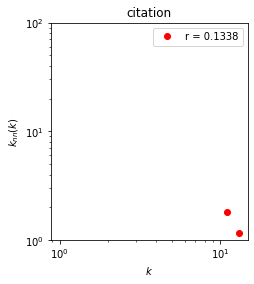

In [17]:
x1, y1 = average_nearest_neighbor_degree(G1)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(x1, y1, "ro", label="r = " + "%.4f"%r1)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title("citation")
plt.ylim([1,100])

介数和核度

In [18]:
# 节点介数
BA = nx.barabasi_albert_graph(20, 2)
bc = nx.betweenness_centrality(BA)
print(bc)

{0: 0.063856400259909, 1: 0.2838995637241251, 2: 0.10521442495126705, 3: 0.19608744082428295, 4: 0.0850714749837557, 5: 0.19328877749930384, 6: 0.03311983662860856, 7: 0.07354497354497352, 8: 0.009048083170890188, 9: 0.0026803118908382065, 10: 0.16544138123085492, 11: 0.03586744639376218, 12: 0.013645224171539959, 13: 0.013645224171539959, 14: 0.006335282651072124, 15: 0.005903648008911166, 16: 0.010916179337231968, 17: 0.0, 18: 0.0181681054488072, 19: 0.005903648008911166}


1


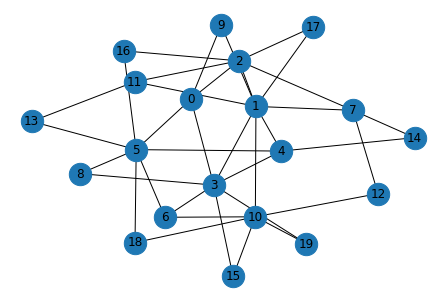

In [19]:
# 获取介数最大的节点标签
max_id = max(bc, key=bc.get)
print(max_id)
# 绘制网络
nx.draw(BA, node_size=500, with_labels=True)

In [20]:
# 边介数
ebc = nx.edge_betweenness_centrality(BA)
print(ebc)

{(0, 2): 0.0578801169590643, (0, 3): 0.05773391812865497, (0, 5): 0.06270467836257308, (0, 9): 0.036622807017543856, (1, 2): 0.04764619883040935, (1, 3): 0.09855054302422724, (1, 4): 0.05657894736842106, (1, 7): 0.07259398496240602, (1, 9): 0.06820175438596492, (1, 10): 0.11955304928989141, (1, 11): 0.07859649122807018, (1, 17): 0.06929824561403508, (2, 7): 0.05982456140350877, (2, 11): 0.03614035087719298, (2, 16): 0.057192982456140344, (2, 17): 0.03070175438596491, (3, 4): 0.05463450292397661, (3, 6): 0.04801796157059316, (3, 8): 0.0662886382623225, (3, 15): 0.06386591478696742, (3, 19): 0.06386591478696742, (4, 5): 0.07217836257309941, (4, 14): 0.06973684210526317, (5, 6): 0.05861737677527152, (5, 8): 0.04999791144527987, (5, 13): 0.07473684210526316, (5, 16): 0.06245614035087718, (5, 18): 0.06722848788638262, (6, 10): 0.05298036758563075, (7, 12): 0.05829573934837092, (7, 14): 0.041666666666666664, (10, 12): 0.06626566416040099, (10, 15): 0.04676065162907268, (10, 18): 0.0654741019

In [21]:
# 核度
ks = nx.core_number(BA)
print(ks)

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2}


{0: 4, 1: 4, 2: 4, 3: 4, 4: 3, 5: 3, 6: 3, 7: 4, 8: 4, 9: 2, 10: 3, 11: 1, 12: 2, 13: 4, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 3, 30: 4, 31: 3, 32: 4, 33: 4}
0


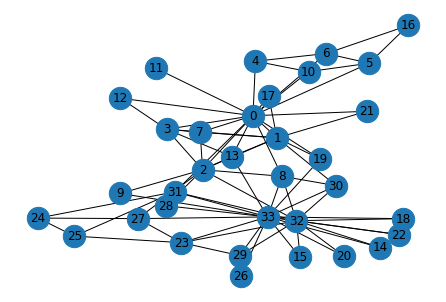

In [22]:
# 使用其他网络
kcg = nx.karate_club_graph()
ks = nx.core_number(kcg)
print(ks)
# 获取核度最大的节点标签
max_id = max(ks, key=ks.get)
print(max_id)
nx.draw(kcg, node_size=500, with_labels=True)

In [23]:
# 几种常用的中心性指标
# 分别生成ER和BA无标度网络，节点数设定为N=100
GER = nx.erdos_renyi_graph(100, 0.08)
GBA = nx.barabasi_albert_graph(100, 4)

In [25]:
# 度中心性
dc1 = nx.degree_centrality(GER)
dc2 = nx.degree_centrality(GBA)
# 介数中心性
bc1 = nx.betweenness_centrality(GER)
bc2 = nx.betweenness_centrality(GBA)
# 接近度中心性
cc1 = nx.closeness_centrality(GER)
cc2 = nx.closeness_centrality(GBA)
# 特征向量中心性
ec1 = nx.eigenvector_centrality(GER)
ec2 = nx.eigenvector_centrality(GBA)


Text(0.5, 1.0, 'eigenvector_centrality')

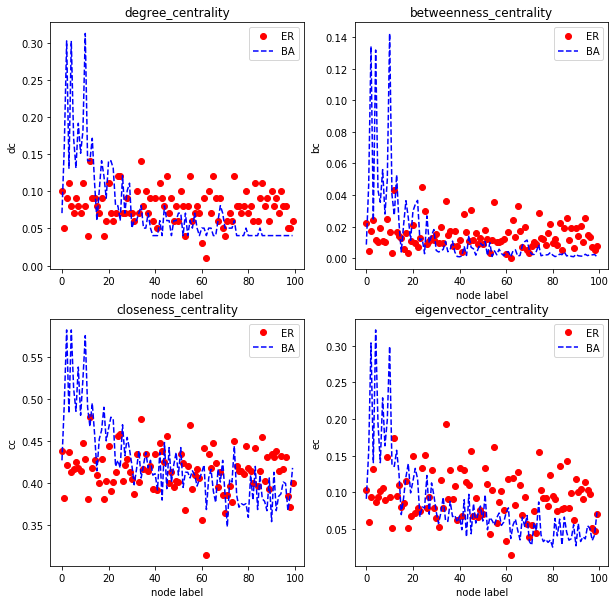

In [30]:
# 绘图比较
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(list(dc1.keys()), list(dc1.values()), "ro", label="ER")
plt.plot(list(dc2.keys()), list(dc2.values()), "b--", label="BA")
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(list(bc1.keys()), list(bc1.values()), "ro", label="ER")
plt.plot(list(bc2.keys()), list(bc2.values()), "b--", label="BA")
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(list(cc1.keys()), list(cc1.values()), "ro", label="ER")
plt.plot(list(cc2.keys()), list(cc2.values()), "b--", label="BA")
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(list(ec1.keys()), list(ec1.values()), "ro", label="ER")
plt.plot(list(ec2.keys()), list(ec2.values()), "b--", label="BA")
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")

有向网络与加权网络的静态特征

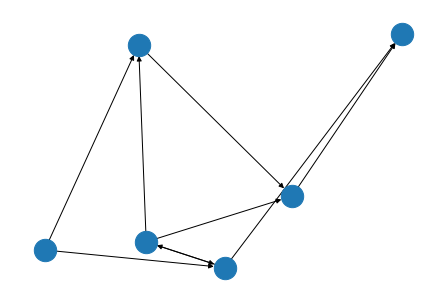

In [32]:
# 有向网络
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4,5,6])
DG.add_edges_from([(1,2), (1,3), (2,4), (3,5), (4,6), (5,2), (5,4), (5,3), (3,6)])
nx.draw(DG, node_size=500, with_label=True)

In [33]:
# 获取各个节点的入度、出度和总度
print(DG.in_degree)
print(DG.out_degree)
print(DG.degree)

[(1, 0), (2, 2), (3, 2), (4, 2), (5, 1), (6, 2)]
[(1, 2), (2, 1), (3, 2), (4, 1), (5, 3), (6, 0)]
[(1, 2), (2, 3), (3, 4), (4, 3), (5, 4), (6, 2)]


加权网络

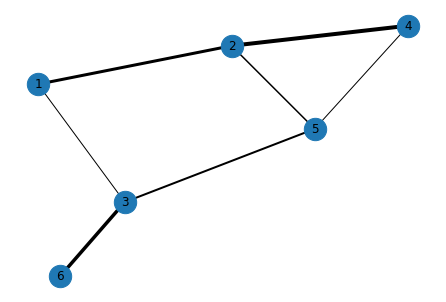

In [39]:
# 创建一个无向加权网络
WG = nx.Graph()
WG.add_nodes_from([1,2,3,4,5,6])
WG.add_weighted_edges_from([(1,2,3),(1,3,1),(2,4,4),(2,5,1.5),(3,5,2), (3,6,3.5),(4,5,1)])
w = [WG[e[0]][e[1]]["weight"] for e in WG.edges()]
nx.draw(WG, node_size=500, width=w, with_labels=True)